# Introduction to Data Science
## Homework 5

Student Name: Manuel Serrano Rebuelta

Student Netid: msr542
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

##### Answer

As it is explained above, LaPlace Smoothing just changes the conditional probability $P(e_i|c)$ adding and extra term in both the numerator and denominator. If we take a close look at this modification, we can observe how now, when $\text{count}(e_i, c) = 0 $, the probability does not become zero. This is the key reason for which LaPlace smoothing is powerful. An example that ilustrates a case in which LaPlace smoothing significantly improves Naïve Bayes performance, and how not using it would result in poor models is as follows: just as it is proposed further in this homework, imagine we have a dataset of movie ratings based on reviews. NB will assign a conditional probability of each piece of evidence occuring with a given class, and compute $P(c|E)$ based on this. The problem comes when one of this prbabilities becomes zero (i.e. a given word has not been seen previously). Because of the Bayes Theorem, if one of the numerator terms is zero, the whole result will be zero, which is not true. This way, using LaPlace smoothing, these cases will become 0.5, and this will not annul the whole result. With respect to the bias-variance tradeoff, we can think that assigning a certain probability to an unknown input can result in adding bias, but at the same time, a fixed probability for unknown evidences aims to find a compromise between variance error and bias, to prevent the model to overfluctuate and underfit.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [92]:
import pandas as pd
data = pd.read_csv("imdb.csv")
#data.head()

2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [93]:
data['Class'] = pd.Series(data['Class'] == 'P', dtype=int)
#data.head()

3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [94]:
from sklearn.cross_validation import train_test_split

X = data['Text']
Y = data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

CV = CountVectorizer(stop_words='english', ngram_range=(1, 2), binary=True)
TF_IDF = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), binary=True)

CV_fitted = CV.fit(X_train)
TF_IDF_fitted = TF_IDF.fit(X_train)

X_train_CV = CV_fitted.transform(X_train)
X_test_CV = CV_fitted.transform(X_test)

X_train_TF_IDF = TF_IDF_fitted.transform(X_train)
X_test_TF_IDF = TF_IDF_fitted.transform(X_test)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [96]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

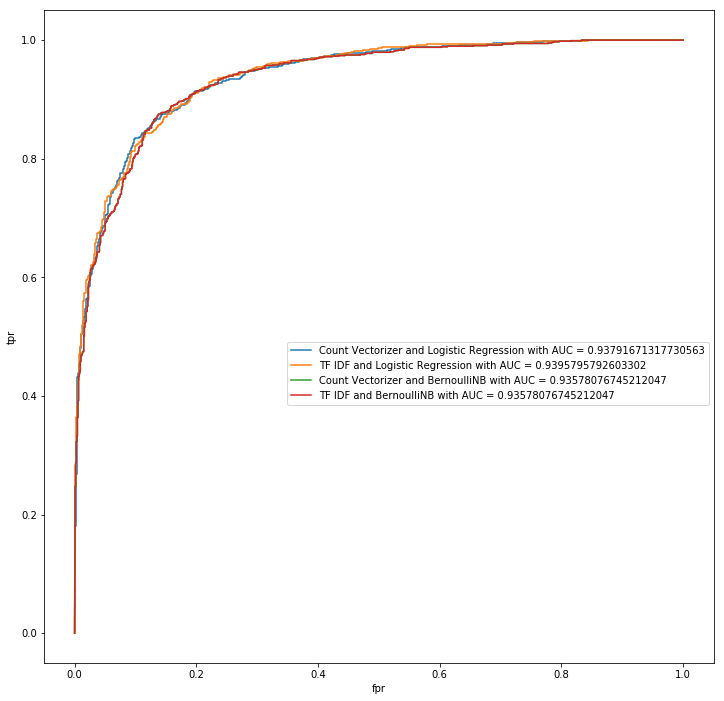

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

############ Logistic Regression
LR_CV = LogisticRegression()
LR_CV.fit(X_train_CV, Y_train)

LR_TF_IDF = LogisticRegression()
LR_TF_IDF.fit(X_train_TF_IDF, Y_train)

LR_CV_predictions_Train = LR_CV.predict_proba(X_train_CV)
LR_CV_predictions_Test = LR_CV.predict_proba(X_test_CV)

LR_TF_IDF_predictions_Train = LR_TF_IDF.predict_proba(X_train_TF_IDF)
LR_TF_IDF_predictions_Test = LR_TF_IDF.predict_proba(X_test_TF_IDF)

#ROCs
fpr_LR_CV, tpr_LR_CV, thresholds_LR_CV = metrics.roc_curve(Y_test, LR_CV_predictions_Test[:, 1])
fpr_LR_TF_IDF, tpr_LR_TF_IDF, thresholds_LR_TF_IDF = metrics.roc_curve(Y_test, LR_TF_IDF_predictions_Test[:, 1])

#AUCs
auc_LR_CV = metrics.auc(fpr_LR_CV, tpr_LR_CV)
auc_LR_TF_IDF = metrics.auc(fpr_LR_TF_IDF, tpr_LR_TF_IDF)

############ BernoulliNB
Ber_CV = BernoulliNB()
Ber_CV.fit(X_train_CV, Y_train)

Ber_TF_IDF = BernoulliNB()
Ber_TF_IDF.fit(X_train_TF_IDF, Y_train)

Ber_CV_predictions_Train = Ber_CV.predict_proba(X_train_CV)
Ber_CV_predictions_Test = Ber_CV.predict_proba(X_test_CV)

Ber_TF_IDF_predictions_Train = Ber_TF_IDF.predict_proba(X_train_TF_IDF)
Ber_TF_IDF_predictions_Test = Ber_TF_IDF.predict_proba(X_test_TF_IDF)
LR_TF_IDF_predictions_Test
#ROCs
fpr_Ber_CV, tpr_Ber_CV, thresholds_Ber_CV = metrics.roc_curve(Y_test, Ber_CV_predictions_Test[:, 1])
fpr_Ber_TF_IDF, tpr_Ber_TF_IDF, thresholds_Ber_TF_IDF = metrics.roc_curve(Y_test, Ber_TF_IDF_predictions_Test[:, 1])

#AUCs
auc_Ber_CV = metrics.auc(fpr_Ber_CV, tpr_Ber_CV)
auc_Ber_TF_IDF = metrics.auc(fpr_Ber_TF_IDF, tpr_Ber_TF_IDF)


#Plots
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111)
ax.plot(fpr_LR_CV, tpr_LR_CV, label='Count Vectorizer and Logistic Regression with AUC = %a' %auc_LR_CV)
ax.plot(fpr_LR_TF_IDF, tpr_LR_TF_IDF, label='TF IDF and Logistic Regression with AUC = %a' %auc_LR_TF_IDF)
ax.plot(fpr_Ber_CV, tpr_Ber_CV, label='Count Vectorizer and BernoulliNB with AUC = %a' %auc_Ber_CV)
ax.plot(fpr_Ber_TF_IDF, tpr_Ber_TF_IDF, label='TF IDF and BernoulliNB with AUC = %a' %auc_Ber_TF_IDF)
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5));
plt.xlabel("fpr")
plt.ylabel("tpr");

##### Which model do you think does a better job?
Logistic Regression performs betters for both Count Vectorizer and TF IDF. This can be seen paying attention to the highest AUC. More concretely, Logistic Regression for TF IDF performs best.

##### Why?
The reason why Logistic Regression outperforms Naïve Bayes in this case is due to the nature of both algorithms. Naïve Bayes estimates a joint probability p(x,y) = p(y)*(x|y) from the training data, this is, builds a generative model. On the other hand, Logistic Regression estimates p(y|x) directly from the training data by minimizing a loss function, this is, builds a discriminative model. For this reason, for large enough datasets, Naïve Bayes might double count features that are correlated with each other, because it assumes they are independent, when they are not. Logistic regression can do a better job just by minimizing the loss out of the training set.

#### EXTRA:
##### Do any of the options perform identically?
Yes. Count Vectorizer with BernoulliNB, and TF IDF with BernoulliNB perform identical.
##### If so, can you explain why?
This happens because the Bernoulli model uses binary occurrence information, ignoring the number of occurrences, which is the only difference between Count Vectorizer and TF IDF. Thus, TF IDF will be exactly interpreted as Count Vectorizer, hence the identical results.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [78]:
import numpy as np
np.set_printoptions(threshold=np.nan)

fail_predictions = LR_TF_IDF.predict(X_test_TF_IDF)^Y_test
#print((fail_predictions).sum()/len(Y_test))

indices = [i for i, x in enumerate(fail_predictions) if x == 1]

actual_values = Y_test.loc[Y_test.index[indices[0:5]]].to_frame()
predicted_vals = LR_TF_IDF.predict(X_test_TF_IDF)[indices[0:5]]

pd.set_option('display.max_colwidth', -1)
final_fail_df = X_test.loc[Y_test.index[indices[0:5]]].to_frame()
final_fail_df['Real'] = actual_values
final_fail_df['Predicted'] = predicted_vals

final_fail_df

,Text,Real,Predicted
4828,'I wasnt expecting much and to be honest I didnt like this film the first time around but watching it again and I realised that its kinda cool. Sure its a one joke film but its a funny gag. Someone posted that it could be better written and it could be. I think this film had the potential to be a over-the-top My Cousin Vinny. But with a horror host instead of a lawyer. Sadly its a wasted opportunity. With just a bit more writing it could be a classic. The kids are underused theres no reason why they should latch on to Elvira. Apart from the obvious reasons. It would have been great to see their relationship flourish. I know its a comedy but its little differences that separate the good films from the brilliant. Elvira herself is always fun and engaging. Not to mention flirty. Every time she smiles you will too. Its hard to knock a film when the main character is so charming. And it really is her charm dont let her looks fool you into thinking that shes some sort of tart. Well she is. But shes a nice one. The sort of person youd let look after your kids. Wouldnt let her cook for them though... Id recommend giving it a go. Just dont expect too much. Shes more than just a great set of boobs. Shes also an incredible pair of legs.',1,0
8385,'Wow! All I can say is that if Elizabeth Montgomery is the enemy (she speaks Russian) then Im surrendering right now. In her short skirt high-top boots and pronounced bust line shes a real babe even if her zombie-like eye-shadow sort of comes and goes. This 30 minutes is no doubt the sexiest of the series. Note the realistic and revealing wrestling match with Bronson until he ungallantly slugs her on the chin ruining all the fun. Okay probably I should leave off my hormonal response. This is a very well produced half-hour by that underrated force behind the seriess success Buck Houghton. Naturally the producers want to lead off the third season with an above average entry. Its post nuclear-holocaust America (we know because shes part of the invading force) and only American Bronson and Soviet Montgomery are left along with about twenty tons of realistic wreckage. They wander among the destruction in alternating moods while we wonder how long it will take for biology to trump politics which of course it eventually does (lucky Bronson). And thats about it. No real talk except for what Bronson has to say which is pretty overblown. Nonetheless the screenplay is still entertaining and rather daring for its time even suggesting that not all Russian women looked like truck drivers (a popular Cold War stereotype of the time). In passing-- its rather curious that the very Slavic-looking Bronson (Buchinsky) would be cast as the American and the glossy-looking Montgomery as the Slav. Appearance-wise it should be the reverse. My guess is that the producers did not want to cast the American in the physically weaker role of the female regardless of appearances. However that may be there is little of the usual TZ fright or atmosphere still the episode remains a very very watchable 30 minutes.',1,0
7436,'I doubt much of this film is based on a true story. At the beginning it says based on a true story sort of. I bet the only truth to it was there was an ex-model turned bounty hunter possibly named Domino. Anyways it begins with Domino talking to Lucy Liu who works for the FBI. Domino is being interrogated about what she knows about a theft of 10 million dollars. Through flashbacks we see Domino as a child then as a model and how she became interested in being a bounty hunter. She basically tells 2 other bounty hunters off Ed and Choco. They let her join the group. Shes tough can use any kind of weapon and will use her good looks if needed. They get involved with a scam that Clarmont a bailsman has going. Along the way the group starts a reality TV show and thats where Ian Zering and Brian Austin Green become involved. They are sort of like hosts and must have been really desperate to a

##### Review number 4828:
Just with the first line it is easy to see how this might have failed. The costumer uses sentences such as: "I wasnt expecting much and to be honest I didnt like this film". Then, he says than later he realized that the movie was "kinda cool". This change in the opinion has not been registered by our model; and combinations such as "didnt like" and "wasnt expecting much" fooled the model.

##### Review number 8385:
In this case, the prediction is not as intuitive as it was in the previous review. This costumer uses much richer vocabulary that probably is not contained anywhere else in the rest of the reviews. The lack of "labels" for this expressions might be the reason for the model to fail. In addition, the costumer uses some negative sentences in between such as "did not want" "not real", that might also affect.

##### Review number 7436:
Reading this review you can clearly tell that, even though the costumer liked the movie, it was not a top rating anyway. Also, in this case, we cannot find strong negative words, but, we cannot find positive sentiment evidences either. For this reason, the model did not have enough information to correctly classify the review.

##### Review number 8488:
As opposed to the 3 previous reviews, in this one, the model predicted it as positive when it was actually negative. Reading the review we can find words that could have fooled the model, such as "success", "best" or "thankfully".

##### Review number 6499:
In this case, we can see how the costumer liked the movie overall, but also points out some negative sides of it. These negative aspects contain words such as "down" or "missing" that clearly fooled the model.
